<a href="https://colab.research.google.com/github/princeKike27/Movie-Classifier-RT/blob/main/MovieClassifierRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Classifier

For this project ....


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Movie-Classifier-RT/main/rotten_tomatoes_movies.csv')

# set max column width to be able to display better the df
pd.options.display.max_colwidth = 25

df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the O...,"Always trouble-prone,...",Though it may seem li...,PG,"Action & Adventure, C...",Chris Columbus,"Craig Titley, Chris C...","Logan Lerman, Brandon...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keene...,Nicole Holofcener's n...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Ama...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-...",Blake Edwards' bawdy ...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Dere...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve ...,Following the closing...,Sidney Lumet's featur...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John F...",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagu...,"20,000 Leagues Under ...","In 1866, Professor Pi...",One of Disney's fines...,G,"Action & Adventure, D...",Richard Fleischer,Earl Felton,"James Mason, Kirk Dou...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
# shape of df
df.shape

(17712, 22)

In [4]:
# check column types
df.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

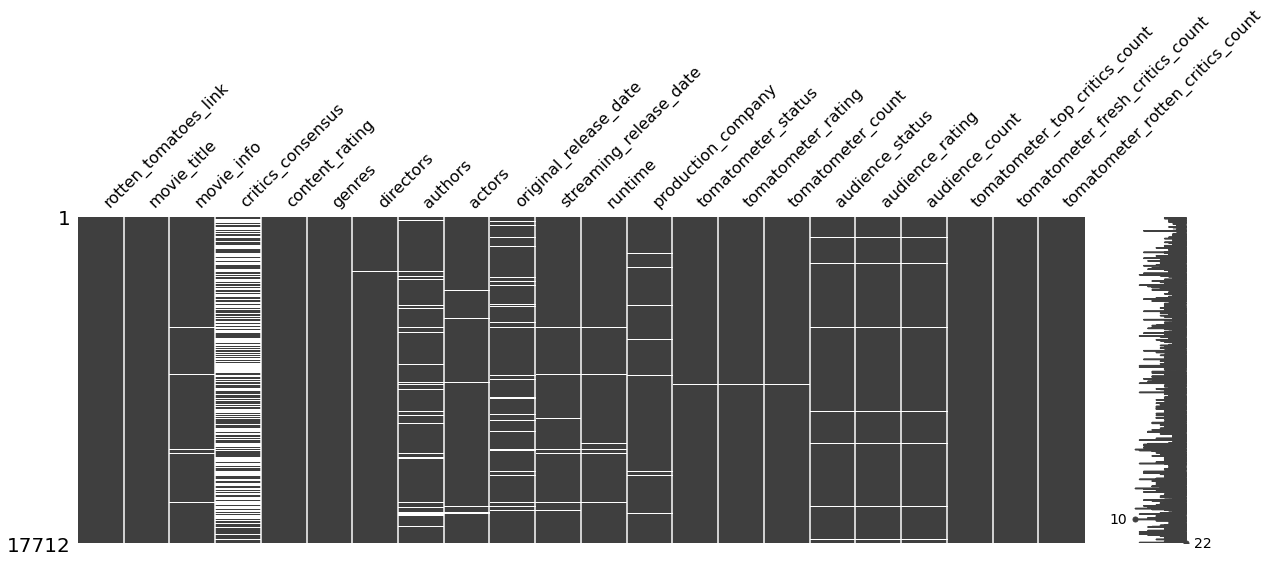

In [5]:
# check for missing values
import missingno as msg

msg.matrix(df, figsize=(20, 6))

In [6]:
# number missing values per column
cols = list(df.columns)

for el in cols:
  print(f'{el}: {df[el].isna().sum()}')

rotten_tomatoes_link: 0
movie_title: 0
movie_info: 321
critics_consensus: 8578
content_rating: 0
genres: 19
directors: 194
authors: 1542
actors: 352
original_release_date: 1166
streaming_release_date: 384
runtime: 314
production_company: 499
tomatometer_status: 44
tomatometer_rating: 44
tomatometer_count: 44
audience_status: 448
audience_rating: 296
audience_count: 297
tomatometer_top_critics_count: 0
tomatometer_fresh_critics_count: 0
tomatometer_rotten_critics_count: 0


In [7]:
# descriptive statistics
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


# Features & Label Selection

### Features & Label Tidying
 - movie_title / genres / original_release_date / runtime / tomatometer_rating

In [8]:
# features
f_l = df[['movie_title', 'genres', 'original_release_date', 'runtime', 'tomatometer_rating']]
f_l.head()

,movie_title,genres,original_release_date,runtime,tomatometer_rating
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0
1,Please Give,Comedy,2010-04-30,90.0,87.0
2,10,"Comedy, Romance",1979-10-05,122.0,67.0
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0


In [9]:
f_l.shape

(17712, 5)

### Genres

In [10]:
# separate the main genre from the genres column
f_l['main_genre'] = f_l.genres.str.split(',').str[0]
f_l.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure


In [11]:
# count of movies per main_genre
f_l.main_genre.value_counts()

Drama                        3789
Comedy                       3725
Action & Adventure           3551
Art House & International    2021
Documentary                  1725
Classics                     1110
Horror                        943
Animation                     379
Mystery & Suspense            289
Kids & Family                  46
Science Fiction & Fantasy      40
Musical & Performing Arts      26
Cult Movies                    22
Romance                        14
Western                         9
Special Interest                3
Television                      1
Name: main_genre, dtype: int64

In [12]:
# check for rows with main_genre NaN
f_l[f_l['main_genre'].isna()]

,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre
1987,400 Days,NaN,2016-01-15,91.0,22.0,NaN
2552,All the Way,NaN,2016-05-21,132.0,87.0,NaN
3233,Batman: Hush,NaN,NaN,82.0,88.0,NaN
3236,Batman: Return Of The...,NaN,NaN,78.0,94.0,NaN
3246,Batman vs. Two-Face,NaN,NaN,72.0,100.0,NaN
5004,Cross of Iron,NaN,1977-01-01,119.0,75.0,NaN
5409,Descendants 2,NaN,NaN,111.0,71.0,NaN
8604,Jane Wants a Boyfriend,NaN,2016-03-25,101.0,38.0,NaN
8860,Justice League vs the...,NaN,NaN,77.0,100.0,NaN
9746,Lost in the Sun,NaN,2015-11-06,95.0,20.0,NaN


In [13]:
# drop rows 
f_l = f_l.dropna(subset=['main_genre'])
f_l.shape

(17693, 6)

#### Year of Release Date

In [14]:
# split the year from the movie original_release_date and save it in a new column
f_l['year'] = f_l['original_release_date'].str.split('-').str[0]

# check for nan values in year column
year_nan = f_l[f_l.year.isna()]

year_nan.head()

,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
58,All Quiet on the West...,Drama,NaN,156.0,100.0,Drama,NaN
72,The Silence,"Action & Adventure, D...",NaN,104.0,50.0,Action & Adventure,NaN
158,The Broken,"Horror, Mystery & Sus...",NaN,88.0,49.0,Horror,NaN
267,Three Blind Mice,"Comedy, Drama",NaN,94.0,80.0,Comedy,NaN
297,Avenging Angel,"Action & Adventure, D...",NaN,93.0,33.0,Action & Adventure,NaN


In [15]:
# print number of nan values in year column
print(f'NaN values in year column: {f_l.year.isna().sum()}')

NaN values in year column: 1154


In [16]:
# Drop NaN values without the year 
f_l = f_l.dropna(subset=['year'])

In [17]:
# turn year column to int
f_l['year'] = f_l.year.astype(int)

#### Runtime


In [18]:
# print number of NaN values in runtime column
print(f'NaN values in runtime column: {f_l.runtime.isna().sum()}')

# print mean of runtime column
print(f'Mean of runtime column: {f_l.runtime.mean()}')

NaN values in runtime column: 164
Mean of runtime column: 102.65832061068703


In [19]:
# replace NaN values in runtime for its mean value
f_l['runtime'] = f_l.runtime.fillna(f_l.runtime.mean())

# print number of NaN values in runtime column
print(f'NaN values in runtime column: {f_l.runtime.isna().sum()}')

# print mean of runtime column
print(f'Mean of runtime column: {f_l.runtime.mean()}')

f_l.head()

NaN values in runtime column: 0
Mean of runtime column: 102.65832061068676


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure,2010
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy,2010
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy,1979
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics,1957
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure,1954


#### Tomatomer Rating

In [20]:
# check for NaN values in tomatometer_rating 
print(f'NaN values in tomatometer_rating column: {f_l.tomatometer_rating.isna().sum()}')

# Mean of tomatometer_rating score
print(f'Mean tomatometer_rating: {f_l.tomatometer_rating.mean()}')

NaN values in tomatometer_rating column: 32
Mean tomatometer_rating: 60.518264978493974


In [21]:
# replace NaN values with mean score
f_l['tomatometer_rating'] = f_l.tomatometer_rating.fillna(f_l.tomatometer_rating.mean())

# check for NaN values in tomatometer_rating 
print(f'NaN values in tomatometer_rating column: {f_l.tomatometer_rating.isna().sum()}')

# Mean of tomatometer_rating score
print(f'Mean tomatometer_rating: {f_l.tomatometer_rating.mean()}')

f_l.head()

NaN values in tomatometer_rating column: 0
Mean tomatometer_rating: 60.51826497849401


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure,2010
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy,2010
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy,1979
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics,1957
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure,1954


### Feature & Label Selection

In [22]:
# select columns from df
df_fl = f_l[['movie_title', 'main_genre', 'runtime', 'year', 'tomatometer_rating',]]

df_fl.head()

,movie_title,main_genre,runtime,year,tomatometer_rating
0,Percy Jackson & the O...,Action & Adventure,119.0,2010,49.0
1,Please Give,Comedy,90.0,2010,87.0
2,10,Comedy,122.0,1979,67.0
3,12 Angry Men (Twelve ...,Classics,95.0,1957,100.0
4,"20,000 Leagues Under ...",Action & Adventure,127.0,1954,89.0


In [23]:
# shape of DataFrame
df_fl.shape

(16539, 5)

In [24]:
# check column types
df_fl.dtypes

movie_title            object
main_genre             object
runtime               float64
year                    int64
tomatometer_rating    float64
dtype: object

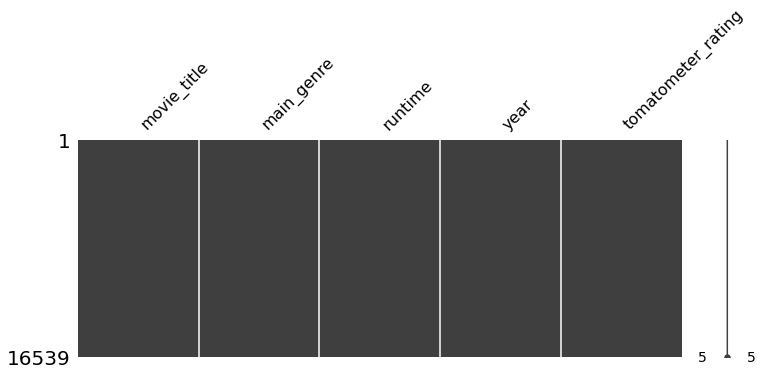

In [25]:
# check for NaN values
msg.matrix(df_fl, figsize=(12, 4))

In [26]:
# descriptive statistics of numeric columns
df_fl.describe()

,runtime,year,tomatometer_rating
count,16539.000000,16539.000000,16539.000000
mean,102.658321,1999.574339,60.518265
std,18.623461,19.602235,28.349617
min,8.000000,1914.000000,0.000000
25%,91.000000,1993.000000,38.000000
50%,100.000000,2006.000000,66.000000
75%,111.000000,2013.000000,85.000000
max,266.000000,2020.000000,100.000000


# Visualizations of Features & Label

#### Distribution of  Numeric Features

Movie´s runtime Skewness: 1.3909329498508107
Movie´s year Skewness: -1.566067499864697
Movie´s tomatometer_rating Skewness: -0.43109097731821544


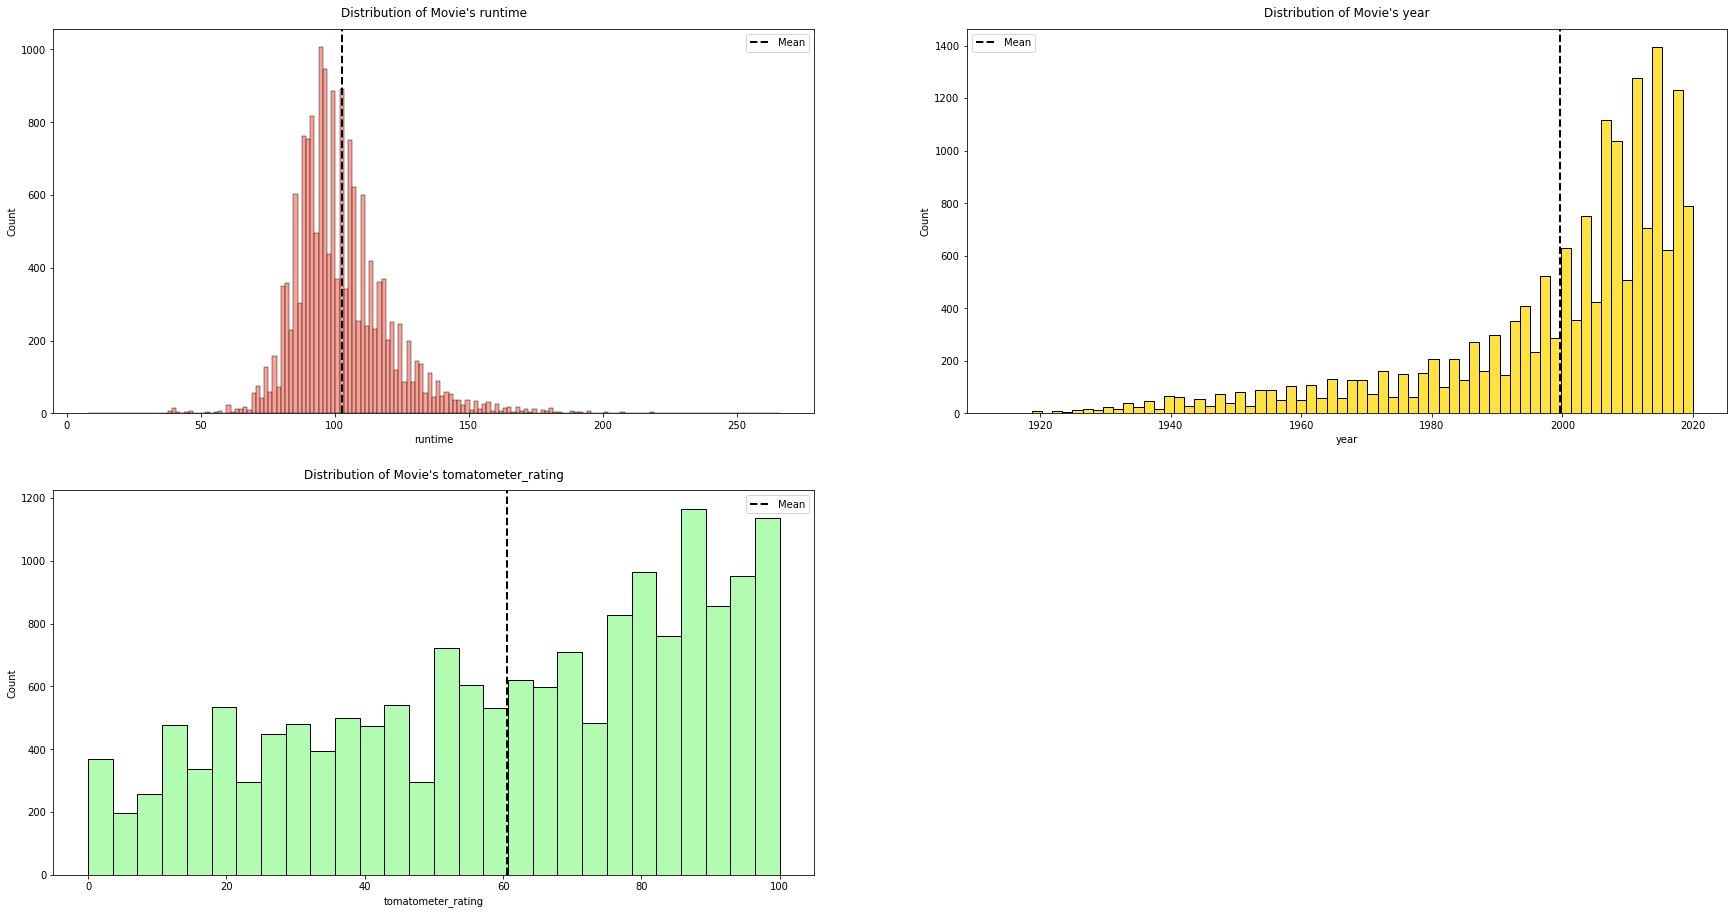

In [27]:
# distribution of numeric features

# list to store column names
numeric = ['runtime', 'year', 'tomatometer_rating']
# list to store colors
colors = ['salmon', 'gold', 'palegreen' ]

# counter to plot graph
n = 1

fig = plt.figure(figsize=(30, 10))


for i in range(0,3):
  ax = plt.subplot(2, 2, n)
  sns.histplot(df_fl[numeric[i]], color = colors[i])
  plt.axvline(df_fl[numeric[i]].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')

  plt.legend()
  plt.title(f"Distribution of Movie's {numeric[i]}", pad=12)
  plt.subplots_adjust(top=1.3)

  print(f"Movie´s {numeric[i]} Skewness: {df_fl[numeric[i]].skew()}")

  n+=1

plt.show()


#### Countplot of main_genre

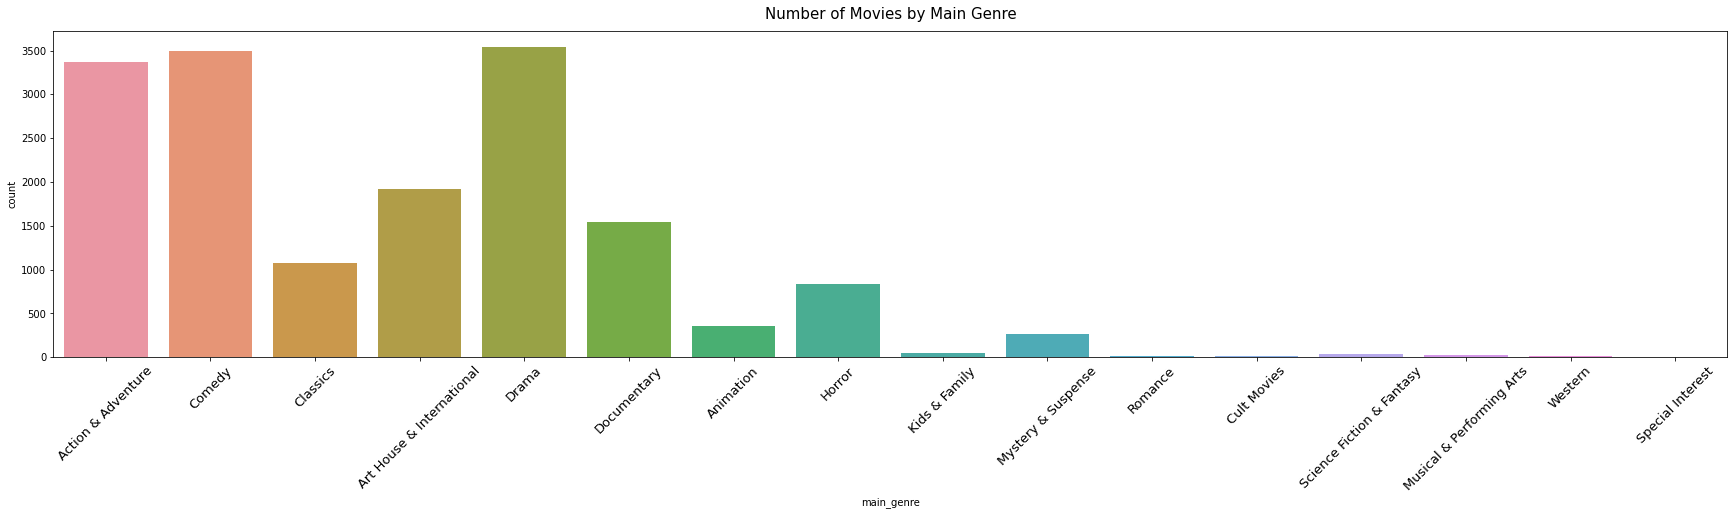

In [28]:
# countplot of movie's main genre

f, ax = plt.subplots(figsize=(30, 6))

sns.countplot(x=df_fl.main_genre)
plt.xticks(fontsize=13)
plt.xticks(rotation=45)

plt.title('Number of Movies by Main Genre', pad=12, fontsize=15)

plt.show()


##### My favorite movie genres are 'Action & Adventure', 'Animation' and 'Mystery & Suspense'

In [29]:
# Category Encoding of main_genre column
  # 'Action & Adventure' >> [1, 0]
  # 'Animation' >> [1, 0]
  # 'Mystery & Suspense' >> [1, 0]
  # 'Other' >> [1,0]

df_fl['is_action_adv'] = [1 if  df_fl.loc[index, 'main_genre'] == 'Action & Adventure' else 0 for index in df_fl.index]
df_fl['is_animation'] = [1 if df_fl.loc[index, 'main_genre'] == 'Animation' else 0 for index in df_fl.index]
df_fl['is_mystery_susp'] = [1 if df_fl.loc[index, 'main_genre'] == 'Mystery & Suspense' else 0 for index in df_fl.index]
df_fl['is_other'] = [1 if df_fl.loc[index, 'main_genre'] != 'Action & Adventure' and df_fl.loc[index, 'main_genre'] != 'Animation' \
                     and df_fl.loc[index, 'main_genre'] != 'Mystery & Suspense' else 0 for index in df_fl.index]


df_fl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,movie_title,main_genre,runtime,year,tomatometer_rating,is_action_adv,is_animation,is_mystery_susp,is_other
0,Percy Jackson & the O...,Action & Adventure,119.0,2010,49.0,1,0,0,0
1,Please Give,Comedy,90.0,2010,87.0,0,0,0,1
2,10,Comedy,122.0,1979,67.0,0,0,0,1
3,12 Angry Men (Twelve ...,Classics,95.0,1957,100.0,0,0,0,1
4,"20,000 Leagues Under ...",Action & Adventure,127.0,1954,89.0,1,0,0,0


##### I only like to see Good Movies. A movie will be worth watching if its tomatometer_rating >= 70

In [30]:
# a movie will be worth watching if its tomatometer score >= 70
df_fl['worth_watching'] = [1 if df_fl.loc[index, 'tomatometer_rating'] >= 70 else 0 for index in df_fl.index]

df_fl.head()

,movie_title,main_genre,runtime,year,tomatometer_rating,is_action_adv,is_animation,is_mystery_susp,is_other,worth_watching
0,Percy Jackson & the O...,Action & Adventure,119.0,2010,49.0,1,0,0,0,0
1,Please Give,Comedy,90.0,2010,87.0,0,0,0,1,1
2,10,Comedy,122.0,1979,67.0,0,0,0,1,0
3,12 Angry Men (Twelve ...,Classics,95.0,1957,100.0,0,0,0,1,1
4,"20,000 Leagues Under ...",Action & Adventure,127.0,1954,89.0,1,0,0,0,1


#### Features Dataframe

In [31]:
# features dataframe
df_features = df_fl[['movie_title', 'runtime', 'year', 'is_action_adv', 'is_animation', 'is_mystery_susp', 'is_other']]

print(df_features.shape)
df_features.head()

(16539, 7)


,movie_title,runtime,year,is_action_adv,is_animation,is_mystery_susp,is_other
0,Percy Jackson & the O...,119.0,2010,1,0,0,0
1,Please Give,90.0,2010,0,0,0,1
2,10,122.0,1979,0,0,0,1
3,12 Angry Men (Twelve ...,95.0,1957,0,0,0,1
4,"20,000 Leagues Under ...",127.0,1954,1,0,0,0


#### Labels Dataframe

In [32]:
# labels dataframe
df_labels = df_fl[['movie_title', 'worth_watching']]

print(df_labels.shape)
df_labels.head()

(16539, 2)


,movie_title,worth_watching
0,Percy Jackson & the O...,0
1,Please Give,1
2,10,0
3,12 Angry Men (Twelve ...,1
4,"20,000 Leagues Under ...",1


# K Nearest Neighbor

> Indented block



- GOAL >> Classify a movie as either worth watching or not.
- When a new movie is passed to the algorithm, it will classify the movie as worth watching & it will provide 5 similar movies with their distances to the movie passsed as input 
- The algorithm uses Euclidean Distance to determine the distance between the movies features

  - distance is like calculating the hypotenuse of a triangle
  - d = srt(a^2 + b^2)
  - where a & b are features 
  - if a is runtime = movie1_runtime  - movie2_runtime - .... movieN)
         d = srt((m1_length[0] - m2_length[0] ... - mN_length[0])^2 
                    + (m1_year[0] - m2_year[1] .... - mN_year[0])^2
                    + .... )



In [38]:
# save feautes & lables without movie names
features = df_features.iloc[:, 1:]
labels = df_labels.iloc[:, 1:]

#### Split Data into Train & Test

In [117]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

print(f'features_train length: {len(features_train)}')
print(f'labels_train length: {len(labels_train)}')
features_train.shape

features_train length: 13231
labels_train length: 13231


(13231, 6)

####  Z-Score Normalization 

- it allows to handle outliers in the runtime and year feature
- Z-score = x - mean / std Dev
  - if the value is below the name it will be a negative number
  - if the value is above the mean it will be a positive number
  - the size of the negative and positive numbers is determined by the standard deviation of the original feature


In [45]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler = StandardScaler()

# features useed to train model
features_train = scaler.fit_transform(features_train)

# features used ti test the model
features_test = scaler.fit_transform(features_test)

#### Model Creation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
k = 0
best_score = 0

# finde best k and accuracy
for i in range(1, 10):
  # create model
  classifier = KNeighborsClassifier(n_neighbors=i, p=2)
  # Train model
  classifier.fit(features_train, labels_train)
  
  # accuracy 
  score = classifier.score(features_test, labels_test)
  # append score to accuracies list
  accuracies.append(score)

  if score > best_score:
    k = i
    best_score = score


In [97]:
# k Neighbors
print(f'K Nearest Neighbors: {k}')


# accuracy of model
train_score = classifier.score(features_train, labels_train)
test_score = classifier.score(features_test, labels_test)

print(f'Train Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')


K Nearest Neighbors: 9
Train Accuracy: 0.6919356057743179
Test Accuracy: 0.6257557436517533


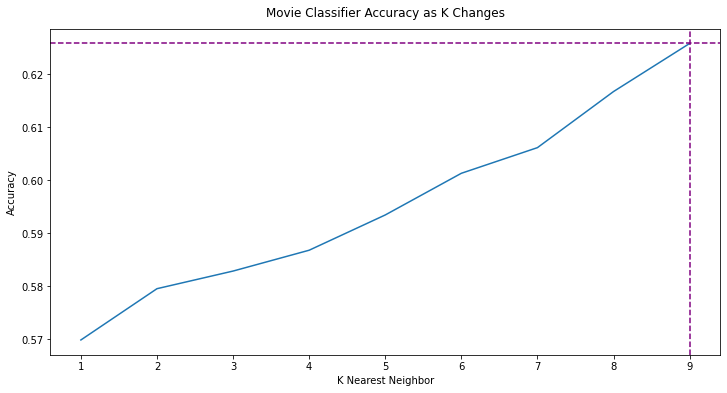

In [108]:
# plot k & accuracies

f,ax = plt.subplots(figsize=(12, 6))

ks = list(range(1,10))
sns.lineplot(x=ks, y=accuracies)
plt.axvline(k, color='purple', linestyle='dashed')
plt.axhline(best_score, color='purple', linestyle='dashed')

plt.xlabel('K Nearest Neighbor')
plt.ylabel('Accuracy')
plt.title('Movie Classifier Accuracy as K Changes', pad=12)

plt.show()

In [132]:
# Movie >> No Time To Die
# runtime: 163 minute >> mean of the dataset is 102
# year: 2020 >> mean of the dataset is 1999
# is_action_adv = 1

movie1 = np.array([3.38, 1.10, 1, 0, 0, 0])
# reshape to 1 row n column
movie1 = movie1.reshape(1, -1)

# predict if I will like the movie
guess1 = classifier.predict(movie1)[0]

if guess1 == 1:
  result = 'YES!!'
else:
  result = 'NO :)'

print(f'Would I like No Time to Die: {result}')

Would I like No Time to Die: YES!!


In [173]:
# get the distance of the neighbors
distances = classifier.kneighbors(movie1)[0][0]
print(distances)

[1.63522822 1.65307501 1.65307501 1.66228106 1.67448568 1.6870499
 1.69701017 1.69972387 1.70997158]


In [172]:
# get indices of neighbors
indices = classifier.kneighbors(movie1, return_distance=False)[0]
print(indices)

[ 5574  9579  9143  5696 10639  1472  9382  4059  4373]


In [170]:
# get information of an specific neighbor
df_fl.loc[5574]

movie_title           Divorce American Style
main_genre                          Classics
runtime                                  109
year                                    1967
tomatometer_rating                       100
is_action_adv                              0
is_animation                               0
is_mystery_susp                            0
is_other                                   1
worth_watching                             1
Name: 5574, dtype: object